---
---

## **Análise não supervisionada em dados de ações do ìndice IBOV (Data Science)**
---
---


# Projeto criado em conjunto com o pessoal da: (https://www.instagram.com/tradingcomdados/) - Trading com dados.
# Durante a live (https://www.youtube.com/watch?v=ytbOqfd2m_o&t=306s).

---
---

## 1. Instalando as Bíbliotecas necessárias 

---

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## 2. Importando bibliotecas 

---

In [ ]:
import pandas as pd
import yfinance as yf
import numpy as np

## 3. Criando uma lista com 30 ativos da bolsa de valores brasileira

---

In [ ]:
tickers = ["EMBR3.SA", "GOAU4.SA", "RECV3.SA", "RRRP3.SA", "BRML3.SA", "BRAP4.SA", "STBP3.SA", "SULA11.SA", "FLRY3.SA", "SOMA3.SA","ARZZ3.SA",
           "ENBR3.SA", "GGPS3.SA", "UNIP6.SA", "SLCE3.SA", "COGN3.SA",  "SMFT3.SA", "AZUL4.SA", "IGTI11.SA", "USIM5.SA",
           "CYRE3.SA","ALUP11.SA", "SAPR11.SA", "VIIA3.SA", "INTB3.SA", "YDUQ3.SA", "BEEF3.SA", "AESB3.SA", "LWSA3.SA", "MRFG3.SA"]

## 4. Criando um data_frame para os ativos
---

In [ ]:
dados = pd.DataFrame()

for i in tickers:
  fund_data = yf.Ticker(i)
  df = pd.DataFrame([fund_data.info.values()],
                    columns=fund_data.info.keys())
  df['ticker'] = i
  dados = dados.append(df)


In [ ]:
dados.head()

,zip,sector,fullTimeEmployees,longBusinessSummary,city,phone,state,country,companyOfficers,website,...,dividendYield,bidSize,dayHigh,coinMarketCapLink,regularMarketPrice,preMarketPrice,logo_url,trailingPegRatio,ticker,fax
0,05425-070,Industrials,15427.0,"Embraer S.A. designs, develops, manufactures, ...",São Paulo,55 11 3040 6874,SP,Brazil,[],https://www.embraer.com,...,NaN,0,14.64,None,14.31,None,https://logo.clearbit.com/embraer.com,None,EMBR3.SA,NaN
0,05425-070,Basic Materials,NaN,"Metalurgica Gerdau S.A., together with its sub...",São Paulo,55 11 3094 6600,SP,Brazil,[],https://www2.gerdau.com,...,0.0959,0,13.35,None,13.02,None,https://logo.clearbit.com/www2.gerdau.com,None,GOAU4.SA,NaN
0,41500-300,Energy,NaN,Petroreconcavo S.A. engages in the exploration...,Salvador,55 71 3635 0296,BA,Brazil,[],https://petroreconcavo.com.br,...,0.0054,None,29.94,None,28.55,None,https://logo.clearbit.com/petroreconcavo.com.br,None,RECV3.SA,NaN
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,None,None,37.74,None,35.40,None,https://logo.clearbit.com/3R.com,None,RRRP3.SA,NaN
0,22430-041,Real Estate,NaN,BR Malls Participações S.A. operates and manag...,Rio De Janeiro,55 21 3138 9900,RJ,Brazil,[],https://ri.brmalls.com.br,...,0.0062,0,8.89,None,8.61,None,https://logo.clearbit.com/ri.brmalls.com.br,None,BRML3.SA,55 21 3138 9901


## 5. Lista dos dados coletadas separados em colunas

---

In [ ]:
list(dados.columns)

['zip',
 'sector',
 'fullTimeEmployees',
 'longBusinessSummary',
 'city',
 'phone',
 'state',
 'country',
 'companyOfficers',
 'website',
 'maxAge',
 'address1',
 'industry',
 'address2',
 'ebitdaMargins',
 'profitMargins',
 'grossMargins',
 'operatingCashflow',
 'revenueGrowth',
 'operatingMargins',
 'ebitda',
 'targetLowPrice',
 'recommendationKey',
 'grossProfits',
 'freeCashflow',
 'targetMedianPrice',
 'currentPrice',
 'earningsGrowth',
 'currentRatio',
 'returnOnAssets',
 'numberOfAnalystOpinions',
 'targetMeanPrice',
 'debtToEquity',
 'returnOnEquity',
 'targetHighPrice',
 'totalCash',
 'totalDebt',
 'totalRevenue',
 'totalCashPerShare',
 'financialCurrency',
 'revenuePerShare',
 'quickRatio',
 'recommendationMean',
 'exchange',
 'shortName',
 'longName',
 'exchangeTimezoneName',
 'exchangeTimezoneShortName',
 'isEsgPopulated',
 'gmtOffSetMilliseconds',
 'quoteType',
 'symbol',
 'messageBoardId',
 'market',
 'annualHoldingsTurnover',
 'enterpriseToRevenue',
 'beta3Year',
 'enter

## 6. Visualizando as variáveis que são categóricas ou não 

---


In [ ]:
dados.isnull().sum()

zip                     4
sector                  1
fullTimeEmployees      12
longBusinessSummary     1
city                    1
                       ..
preMarketPrice         30
logo_url                0
trailingPegRatio       30
ticker                  0
fax                    21
Length: 157, dtype: int64

In [ ]:
dados.dtypes

zip                     object
sector                  object
fullTimeEmployees      float64
longBusinessSummary     object
city                    object
                        ...   
preMarketPrice          object
logo_url                object
trailingPegRatio        object
ticker                  object
fax                     object
Length: 157, dtype: object

## 7. Alterar o index para representar cada ativo

---

In [ ]:
dados.index = dados["ticker"]

In [ ]:
dados.head()

,zip,sector,fullTimeEmployees,longBusinessSummary,city,phone,state,country,companyOfficers,website,...,dividendYield,bidSize,dayHigh,coinMarketCapLink,regularMarketPrice,preMarketPrice,logo_url,trailingPegRatio,ticker,fax
ticker,,,,,,,,,,,,,,,,,,,,,
EMBR3.SA,05425-070,Industrials,15427.0,"Embraer S.A. designs, develops, manufactures, ...",São Paulo,55 11 3040 6874,SP,Brazil,[],https://www.embraer.com,...,NaN,0,14.64,None,14.31,None,https://logo.clearbit.com/embraer.com,None,EMBR3.SA,NaN
GOAU4.SA,05425-070,Basic Materials,NaN,"Metalurgica Gerdau S.A., together with its sub...",São Paulo,55 11 3094 6600,SP,Brazil,[],https://www2.gerdau.com,...,0.0959,0,13.35,None,13.02,None,https://logo.clearbit.com/www2.gerdau.com,None,GOAU4.SA,NaN
RECV3.SA,41500-300,Energy,NaN,Petroreconcavo S.A. engages in the exploration...,Salvador,55 71 3635 0296,BA,Brazil,[],https://petroreconcavo.com.br,...,0.0054,None,29.94,None,28.55,None,https://logo.clearbit.com/petroreconcavo.com.br,None,RECV3.SA,NaN
RRRP3.SA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,None,None,37.74,None,35.40,None,https://logo.clearbit.com/3R.com,None,RRRP3.SA,NaN
BRML3.SA,22430-041,Real Estate,NaN,BR Malls Participações S.A. operates and manag...,Rio De Janeiro,55 21 3138 9900,RJ,Brazil,[],https://ri.brmalls.com.br,...,0.0062,0,8.89,None,8.61,None,https://logo.clearbit.com/ri.brmalls.com.br,None,BRML3.SA,55 21 3138 9901


## 8. Selecionar os dados tipo "Float"
---


In [ ]:
df = dados.select_dtypes(include=[np.float64])

In [ ]:
df.columns

Index(['fullTimeEmployees', 'currentPrice', '52WeekChange', 'bookValue',
       'lastFiscalYearEnd', 'heldPercentInstitutions', 'netIncomeToCommon',
       'trailingEps', 'SandP52WeekChange', 'heldPercentInsiders',
       'nextFiscalYearEnd', 'mostRecentQuarter', 'enterpriseValue',
       'previousClose', 'regularMarketOpen', 'twoHundredDayAverage',
       'trailingAnnualDividendYield', 'regularMarketDayHigh',
       'regularMarketPreviousClose', 'fiftyDayAverage',
       'trailingAnnualDividendRate', 'open', 'regularMarketDayLow', 'dayLow',
       'ask', 'fiftyTwoWeekHigh', 'fiftyTwoWeekLow', 'bid', 'dayHigh',
       'regularMarketPrice'],
      dtype='object')

In [ ]:
df.isnull().sum()

fullTimeEmployees              12
currentPrice                    0
52WeekChange                    1
bookValue                       1
lastFiscalYearEnd               1
heldPercentInstitutions         1
netIncomeToCommon               1
trailingEps                     1
SandP52WeekChange               1
heldPercentInsiders             1
nextFiscalYearEnd               1
mostRecentQuarter               1
enterpriseValue                 1
previousClose                   0
regularMarketOpen               0
twoHundredDayAverage            0
trailingAnnualDividendYield     0
regularMarketDayHigh            0
regularMarketPreviousClose      0
fiftyDayAverage                 0
trailingAnnualDividendRate      0
open                            0
regularMarketDayLow             0
dayLow                          0
ask                             0
fiftyTwoWeekHigh                0
fiftyTwoWeekLow                 0
bid                             0
dayHigh                         0
regularMarketP

## 9. Colocando (-1) nos dados faltantes 
---

In [ ]:
df = df.fillna(-1)

In [ ]:
df.isnull().any()

fullTimeEmployees              False
currentPrice                   False
52WeekChange                   False
bookValue                      False
lastFiscalYearEnd              False
heldPercentInstitutions        False
netIncomeToCommon              False
trailingEps                    False
SandP52WeekChange              False
heldPercentInsiders            False
nextFiscalYearEnd              False
mostRecentQuarter              False
enterpriseValue                False
previousClose                  False
regularMarketOpen              False
twoHundredDayAverage           False
trailingAnnualDividendYield    False
regularMarketDayHigh           False
regularMarketPreviousClose     False
fiftyDayAverage                False
trailingAnnualDividendRate     False
open                           False
regularMarketDayLow            False
dayLow                         False
ask                            False
fiftyTwoWeekHigh               False
fiftyTwoWeekLow                False
b

In [ ]:
df.head()

,fullTimeEmployees,currentPrice,52WeekChange,bookValue,lastFiscalYearEnd,heldPercentInstitutions,netIncomeToCommon,trailingEps,SandP52WeekChange,heldPercentInsiders,...,trailingAnnualDividendRate,open,regularMarketDayLow,dayLow,ask,fiftyTwoWeekHigh,fiftyTwoWeekLow,bid,dayHigh,regularMarketPrice
ticker,,,,,,,,,,,,,,,,,,,,,
EMBR3.SA,15427.0,14.31,-0.265823,20.265,1.640909e+09,0.37445,-1.061715e+09,0.00,-0.135148,0.05370,...,0.000,14.50,14.30,14.30,14.34,25.62,10.75,14.36,14.64,14.31
GOAU4.SA,-1.0,13.02,0.212093,13.638,1.640909e+09,0.73159,4.516547e+09,4.19,-0.135148,0.02319,...,2.340,13.03,12.90,12.90,13.03,13.50,9.12,12.98,13.35,13.02
RECV3.SA,-1.0,28.55,1.014315,11.009,1.640909e+09,0.50035,6.280920e+08,2.28,-0.135148,0.32366,...,0.163,29.76,28.24,28.24,28.71,36.66,13.22,28.70,29.94,28.55
RRRP3.SA,-1.0,35.40,-1.000000,-1.000,-1.000000e+00,-1.00000,-1.000000e+00,-1.00,-1.000000,-1.00000,...,0.000,37.40,35.27,35.27,35.56,51.58,26.35,35.54,37.74,35.40
BRML3.SA,-1.0,8.61,0.110276,13.510,1.640909e+09,0.81877,5.421760e+08,0.56,-0.135148,0.05050,...,0.054,8.86,8.58,8.58,8.63,10.65,6.89,8.59,8.89,8.61


## 10. importando os pacotes que serão utilizados no agrupamento dos dados
---

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score

In [ ]:
scale = StandardScaler()

In [ ]:
df_scale = scale.fit_transform(df)

---
---
# 10.1 Trabalhando com diferentes tecnicas
---
---

# 11. Trabalhando com o Kmeans
---

In [ ]:
centroides = [2,3,4,5,6,7,8,9,10]

for num_centroide in centroides:
  km = KMeans(n_clusters=num_centroide)
  predicao = km.fit_predict(df_scale)

  score = silhouette_score(df_scale, predicao)
  print("O valor do silhouetee_score é {}, para um numero de clusers igual a {}".format(score, num_centroide))

O valor do silhouetee_score é 0.65313299000633, para um numero de clusers igual a 2
O valor do silhouetee_score é 0.6458852515394308, para um numero de clusers igual a 3
O valor do silhouetee_score é 0.3559001551718693, para um numero de clusers igual a 4
O valor do silhouetee_score é 0.34542991407452295, para um numero de clusers igual a 5
O valor do silhouetee_score é 0.3170392207459732, para um numero de clusers igual a 6
O valor do silhouetee_score é 0.22538934307709238, para um numero de clusers igual a 7
O valor do silhouetee_score é 0.3040319725676191, para um numero de clusers igual a 8
O valor do silhouetee_score é 0.1439707139597279, para um numero de clusers igual a 9
O valor do silhouetee_score é 0.14133449136539522, para um numero de clusers igual a 10


# 12. Trabalhando com o Agglomerative
---

In [ ]:
clusters = [2,3,4,5,6,7,8,9,10]

for num_cluster in clusters:
  agg = AgglomerativeClustering(n_clusters=num_cluster)
  predicao = agg.fit_predict(df_scale)

  score = silhouette_score(df_scale, predicao)
  print("O valor do silhouetee_score é {}, para um numero de clusers igual a {}".format(score, num_cluster))

O valor do silhouetee_score é 0.65313299000633, para um numero de clusers igual a 2
O valor do silhouetee_score é 0.6458852515394308, para um numero de clusers igual a 3
O valor do silhouetee_score é 0.2210277503075528, para um numero de clusers igual a 4
O valor do silhouetee_score é 0.24279882258500596, para um numero de clusers igual a 5
O valor do silhouetee_score é 0.20766896637001672, para um numero de clusers igual a 6
O valor do silhouetee_score é 0.21190792044326318, para um numero de clusers igual a 7
O valor do silhouetee_score é 0.22563749002854128, para um numero de clusers igual a 8
O valor do silhouetee_score é 0.21390812268569598, para um numero de clusers igual a 9
O valor do silhouetee_score é 0.19690573639402323, para um numero de clusers igual a 10


# 13. Trabalhando com o DBSCAN
---

In [ ]:
eps = [5,6,7,8,9,10,11]

for num_eps in eps:
  db = DBSCAN(eps=num_eps)
  predicao = db.fit_predict(df_scale)
  score = silhouette_score(df_scale, predicao)
  print("O valor de silhouette_score é {}, para um numero de clusters igual a {}".format(score, num_cluster))

O valor de silhouette_score é 0.6303441258310333, para um numero de clusters igual a 10
O valor de silhouette_score é 0.6303441258310333, para um numero de clusters igual a 10
O valor de silhouette_score é 0.6303441258310333, para um numero de clusters igual a 10
O valor de silhouette_score é 0.6303441258310333, para um numero de clusters igual a 10
O valor de silhouette_score é 0.5845106141084929, para um numero de clusters igual a 10
O valor de silhouette_score é 0.5845106141084929, para um numero de clusters igual a 10
O valor de silhouette_score é 0.570747835029586, para um numero de clusters igual a 10


# 14. Importando Isolation Forest
---

In [ ]:
from sklearn.ensemble import IsolationForest

In [ ]:
iso = IsolationForest(random_state=42)

In [ ]:
df["IsolationForest"] = iso.fit_predict(df_scale)

In [ ]:
df["IsolationForest"].value_counts()

 1    26
-1     4
Name: IsolationForest, dtype: int64

In [ ]:
km

KMeans(n_clusters=10)

# 15. Adcionando tecnicas no df
---

In [ ]:
km = KMeans(n_clusters=2)
df['Km_02'] = km.fit_predict(df_scale)

In [ ]:
agg = AgglomerativeClustering(n_clusters=3)

df["agg_03"] = agg.fit_predict(df_scale)

In [ ]:
db = DBSCAN(eps=9)
df['db_9'] = db.fit_predict(df_scale)

In [ ]:
df.head()

,fullTimeEmployees,currentPrice,52WeekChange,bookValue,lastFiscalYearEnd,heldPercentInstitutions,netIncomeToCommon,trailingEps,SandP52WeekChange,heldPercentInsiders,...,ask,fiftyTwoWeekHigh,fiftyTwoWeekLow,bid,dayHigh,regularMarketPrice,IsolationForest,Km_02,agg_03,db_9
ticker,,,,,,,,,,,,,,,,,,,,,
EMBR3.SA,15427.0,14.31,-0.265823,20.265,1.640909e+09,0.37445,-1.061715e+09,0.00,-0.135148,0.05370,...,14.34,25.62,10.75,14.36,14.64,14.31,1,0,0,0
GOAU4.SA,-1.0,13.02,0.212093,13.638,1.640909e+09,0.73159,4.516547e+09,4.19,-0.135148,0.02319,...,13.03,13.50,9.12,12.98,13.35,13.02,1,0,0,0
RECV3.SA,-1.0,28.55,1.014315,11.009,1.640909e+09,0.50035,6.280920e+08,2.28,-0.135148,0.32366,...,28.71,36.66,13.22,28.70,29.94,28.55,1,0,0,0
RRRP3.SA,-1.0,35.40,-1.000000,-1.000,-1.000000e+00,-1.00000,-1.000000e+00,-1.00,-1.000000,-1.00000,...,35.56,51.58,26.35,35.54,37.74,35.40,-1,0,2,-1
BRML3.SA,-1.0,8.61,0.110276,13.510,1.640909e+09,0.81877,5.421760e+08,0.56,-0.135148,0.05050,...,8.63,10.65,6.89,8.59,8.89,8.61,1,0,0,0


In [ ]:
df['db_9'].value_counts()

 0    28
-1     2
Name: db_9, dtype: int64

In [ ]:
df.loc[(df['IsolationForest'] == -1)]

,fullTimeEmployees,currentPrice,52WeekChange,bookValue,lastFiscalYearEnd,heldPercentInstitutions,netIncomeToCommon,trailingEps,SandP52WeekChange,heldPercentInsiders,...,ask,fiftyTwoWeekHigh,fiftyTwoWeekLow,bid,dayHigh,regularMarketPrice,IsolationForest,Km_02,agg_03,db_9
ticker,,,,,,,,,,,,,,,,,,,,,
RRRP3.SA,-1.0,35.40,-1.000000,-1.000,-1.000000e+00,-1.00000,-1.000000e+00,-1.00,-1.000000,-1.00000,...,35.56,51.58,26.350000,35.54,37.74,35.40,-1,0,2,-1
ARZZ3.SA,6983.0,86.86,0.329912,23.348,1.640909e+09,0.36380,4.218300e+08,3.74,-0.135148,0.41379,...,87.40,105.99,63.390000,86.82,90.88,86.86,-1,1,1,0
UNIP6.SA,1400.0,97.29,0.189848,22.040,1.640909e+09,0.25345,1.861771e+09,16.07,-0.135148,0.24397,...,97.04,117.00,79.354546,96.93,99.88,97.29,-1,1,1,-1
SLCE3.SA,2917.0,44.75,0.216724,23.201,1.640909e+09,0.32599,1.334908e+09,6.84,-0.135148,0.52211,...,45.90,57.75,33.318180,44.48,45.88,44.75,-1,0,0,0


In [ ]:
conferencia = dados[dados.index.isin(df.index)]
conferencia

,zip,sector,fullTimeEmployees,longBusinessSummary,city,phone,state,country,companyOfficers,website,...,dividendYield,bidSize,dayHigh,coinMarketCapLink,regularMarketPrice,preMarketPrice,logo_url,trailingPegRatio,ticker,fax
ticker,,,,,,,,,,,,,,,,,,,,,
EMBR3.SA,05425-070,Industrials,15427.0,"Embraer S.A. designs, develops, manufactures, ...",São Paulo,55 11 3040 6874,SP,Brazil,[],https://www.embraer.com,...,NaN,0,14.64,None,14.31,None,https://logo.clearbit.com/embraer.com,None,EMBR3.SA,NaN
GOAU4.SA,05425-070,Basic Materials,NaN,"Metalurgica Gerdau S.A., together with its sub...",São Paulo,55 11 3094 6600,SP,Brazil,[],https://www2.gerdau.com,...,0.0959,0,13.35,None,13.02,None,https://logo.clearbit.com/www2.gerdau.com,None,GOAU4.SA,NaN
RECV3.SA,41500-300,Energy,NaN,Petroreconcavo S.A. engages in the exploration...,Salvador,55 71 3635 0296,BA,Brazil,[],https://petroreconcavo.com.br,...,0.0054,None,29.94,None,28.55,None,https://logo.clearbit.com/petroreconcavo.com.br,None,RECV3.SA,NaN
RRRP3.SA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,None,None,37.74,None,35.40,None,https://logo.clearbit.com/3R.com,None,RRRP3.SA,NaN
BRML3.SA,22430-041,Real Estate,NaN,BR Malls Participações S.A. operates and manag...,Rio De Janeiro,55 21 3138 9900,RJ,Brazil,[],https://ri.brmalls.com.br,...,0.0062,0,8.89,None,8.61,None,https://logo.clearbit.com/ri.brmalls.com.br,None,BRML3.SA,55 21 3138 9901
BRAP4.SA,01310-917,Financial Services,NaN,"Bradespar S.A., through its interest in VALE, ...",São Paulo,55 11 2178 6300,SP,Brazil,[],https://www.bradespar.com.br,...,0.3372,0,27.53,None,26.79,None,https://logo.clearbit.com/bradespar.com.br,None,BRAP4.SA,55 11 2178 6315
STBP3.SA,04543-121,Industrials,2931.0,"Santos Brasil Participações S.A., through its ...",São Paulo,55 11 3279 3279,SP,Brazil,[],https://www.santosbrasil.com.br,...,0.1159,0,7.80,None,7.43,None,https://logo.clearbit.com/santosbrasil.com.br,None,STBP3.SA,NaN
SULA11.SA,20211-903,Financial Services,4000.0,"Sul América S.A., through its subsidiaries, en...",Rio De Janeiro,55 21 2506 9111,RJ,Brazil,[],https://portal.sulamericaseguros.com.br,...,0.018,0,22.97,None,21.69,None,https://logo.clearbit.com/portal.sulamericaseg...,None,SULA11.SA,NaN
FLRY3.SA,04344-903,Healthcare,16700.0,"Fleury S.A., together with its subsidiaries, p...",São Paulo,55 11 5014 7200,SP,Brazil,[],https://ri.fleury.com.br,...,0.0404,0,17.45,None,17.16,None,https://logo.clearbit.com/ri.fleury.com.br,None,FLRY3.SA,55 11 5014 7425


# 16. Resultados das tecnicas utilizadas
---

In [ ]:
resultados = df[['agg_03','db_9','IsolationForest','Km_02']]
resultados

,agg_03,db_9,IsolationForest,Km_02
ticker,,,,
EMBR3.SA,0,0,1,0
GOAU4.SA,0,0,1,0
RECV3.SA,0,0,1,0
RRRP3.SA,2,-1,-1,0
BRML3.SA,0,0,1,0
BRAP4.SA,0,0,1,0
STBP3.SA,0,0,1,0
SULA11.SA,0,0,1,0
FLRY3.SA,0,0,1,0


In [ ]:
resultado_final = conferencia.merge(resultados,
                                    left_index=True,
                                    right_index=True)

In [ ]:
resultado_final

,zip,sector,fullTimeEmployees,longBusinessSummary,city,phone,state,country,companyOfficers,website,...,regularMarketPrice,preMarketPrice,logo_url,trailingPegRatio,ticker,fax,agg_03,db_9,IsolationForest,Km_02
ticker,,,,,,,,,,,,,,,,,,,,,
EMBR3.SA,05425-070,Industrials,15427.0,"Embraer S.A. designs, develops, manufactures, ...",São Paulo,55 11 3040 6874,SP,Brazil,[],https://www.embraer.com,...,14.31,None,https://logo.clearbit.com/embraer.com,None,EMBR3.SA,NaN,0,0,1,0
GOAU4.SA,05425-070,Basic Materials,NaN,"Metalurgica Gerdau S.A., together with its sub...",São Paulo,55 11 3094 6600,SP,Brazil,[],https://www2.gerdau.com,...,13.02,None,https://logo.clearbit.com/www2.gerdau.com,None,GOAU4.SA,NaN,0,0,1,0
RECV3.SA,41500-300,Energy,NaN,Petroreconcavo S.A. engages in the exploration...,Salvador,55 71 3635 0296,BA,Brazil,[],https://petroreconcavo.com.br,...,28.55,None,https://logo.clearbit.com/petroreconcavo.com.br,None,RECV3.SA,NaN,0,0,1,0
RRRP3.SA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,35.40,None,https://logo.clearbit.com/3R.com,None,RRRP3.SA,NaN,2,-1,-1,0
BRML3.SA,22430-041,Real Estate,NaN,BR Malls Participações S.A. operates and manag...,Rio De Janeiro,55 21 3138 9900,RJ,Brazil,[],https://ri.brmalls.com.br,...,8.61,None,https://logo.clearbit.com/ri.brmalls.com.br,None,BRML3.SA,55 21 3138 9901,0,0,1,0
BRAP4.SA,01310-917,Financial Services,NaN,"Bradespar S.A., through its interest in VALE, ...",São Paulo,55 11 2178 6300,SP,Brazil,[],https://www.bradespar.com.br,...,26.79,None,https://logo.clearbit.com/bradespar.com.br,None,BRAP4.SA,55 11 2178 6315,0,0,1,0
STBP3.SA,04543-121,Industrials,2931.0,"Santos Brasil Participações S.A., through its ...",São Paulo,55 11 3279 3279,SP,Brazil,[],https://www.santosbrasil.com.br,...,7.43,None,https://logo.clearbit.com/santosbrasil.com.br,None,STBP3.SA,NaN,0,0,1,0
SULA11.SA,20211-903,Financial Services,4000.0,"Sul América S.A., through its subsidiaries, en...",Rio De Janeiro,55 21 2506 9111,RJ,Brazil,[],https://portal.sulamericaseguros.com.br,...,21.69,None,https://logo.clearbit.com/portal.sulamericaseg...,None,SULA11.SA,NaN,0,0,1,0
FLRY3.SA,04344-903,Healthcare,16700.0,"Fleury S.A., together with its subsidiaries, p...",São Paulo,55 11 5014 7200,SP,Brazil,[],https://ri.fleury.com.br,...,17.16,None,https://logo.clearbit.com/ri.fleury.com.br,None,FLRY3.SA,55 11 5014 7425,0,0,1,0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

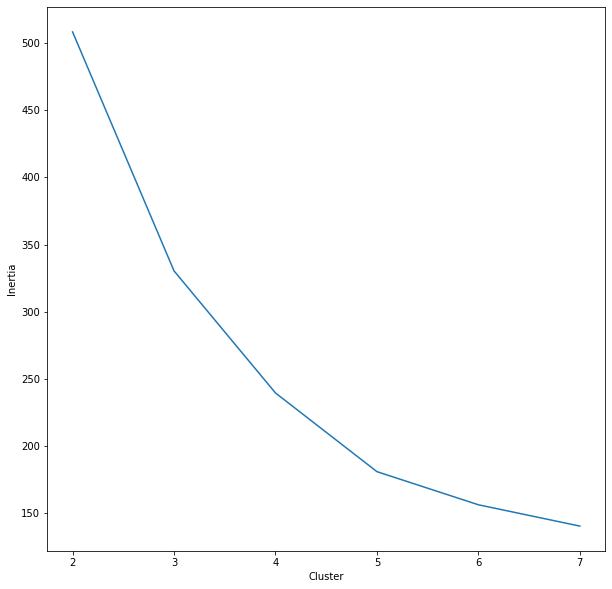

In [ ]:
inertia_list = []
for i in range(2,8):
  kmeans = KMeans(n_clusters=i, random_state=42)
  kmeans.fit(df_scale)
  inertia_list.append(kmeans.inertia_)
        
# plotting
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
sns.lineplot(y=inertia_list, x=range(2,8), ax=ax)
ax.set_xlabel("Cluster")
ax.set_ylabel("Inertia")
ax.set_xticks(list(range(2,8)))
fig.show()

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

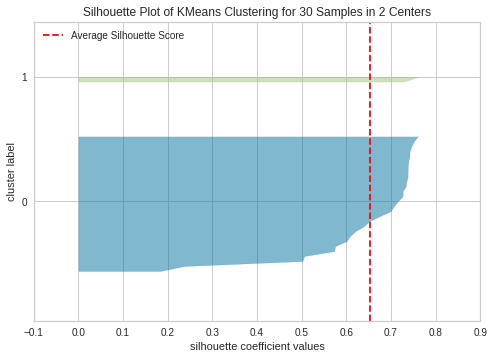

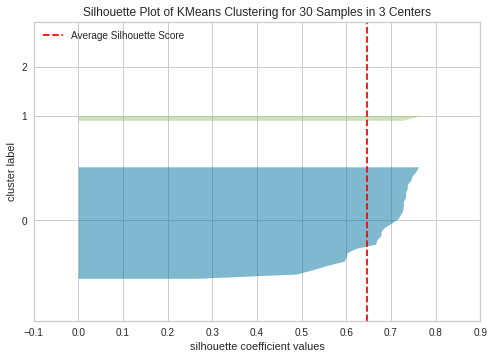

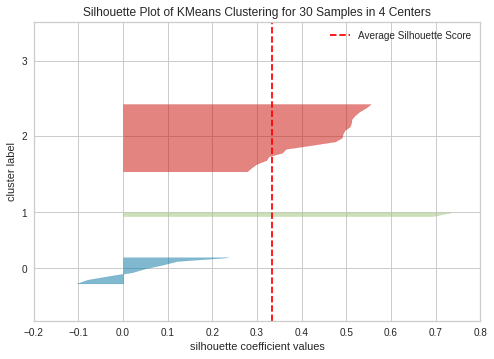

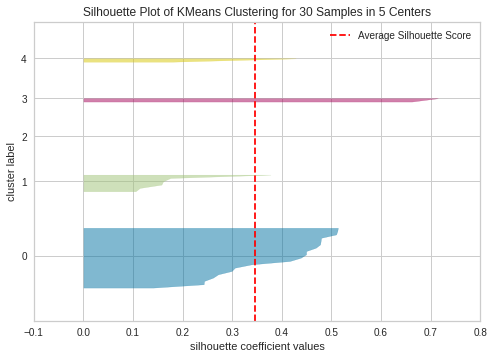

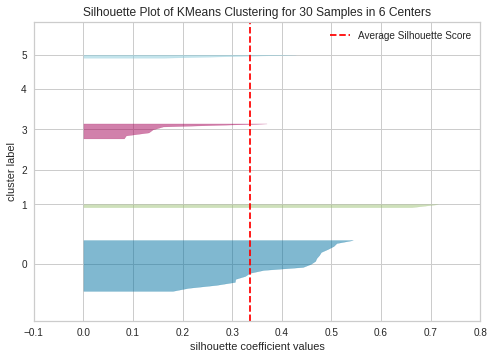

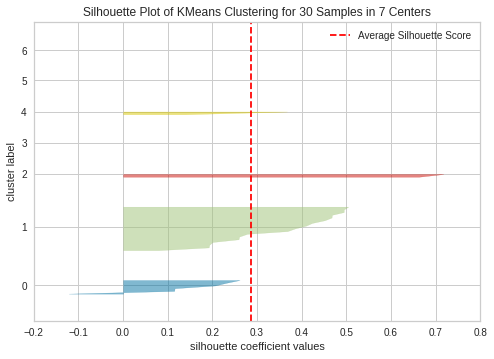

In [ ]:
for i in range(2,8):

  km = KMeans(n_clusters=i, 
              random_state=42)
  visualizer = SilhouetteVisualizer(km,
                                  colors='yellowbrick')

  visualizer.fit(df_scale)
  visualizer.show()

---
# FIM!
---